In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

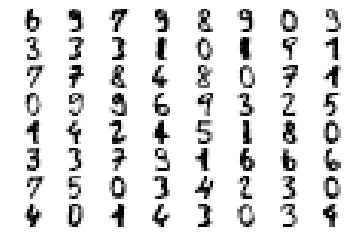

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
numbers = [*range(10)] # number 2 > number 1
number_of_classification = len(numbers)


list_y = y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    digits_indexes.extend(li)

samplesize = X[digits_indexes].shape[0]
x_inputs =[tuple(c) for c in X[digits_indexes].tolist()]
x_outputs = [tuple(c) for c in y[digits_indexes].reshape(samplesize,1).tolist()]

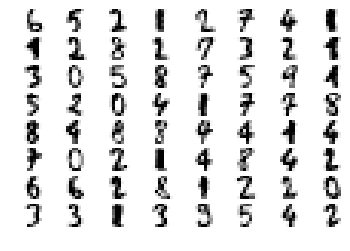

In [6]:
from random import randint
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(np.array(x_inputs[randint(0, samplesize)]).reshape(8,8), cmap='Greys')
plt.show()

In [7]:
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        
        outputs = []
        for xi in x_inputs:
            output = net.activate(xi)
            outputs.append(output)
        
        
        px_outputs = softmax(np.array(outputs).reshape(samplesize, number_of_classification), axis=1)
        # the index of maximum in each line
        pred_outputs = np.argmax(px_outputs, axis = 1)
        # replace index to real number, from higher number to lower number!!
        for i in range(number_of_classification):
            index = number_of_classification - i - 1
            pred_outputs[pred_outputs==index] = numbers[index]
        
        real_outputs = np.array(x_outputs).reshape(samplesize,)
        
        acc = np.sum(pred_outputs == real_outputs)/samplesize

        genome.fitness = acc

def run(config_file):
    # Load configuration.
    config = neat.Config(
        neat.DefaultGenome,
        neat.DefaultReproduction,
        neat.DefaultSpeciesSet,
        neat.DefaultStagnation,
        config_file,
    )

    # Create the population, which is the top-level object for a NEAT run.
    p = neat.Population(config)

    # add a stdout reporter to show progress in the terminal
    reporter = neat.StdOutReporter(False)
    p.add_reporter(reporter)
    stats = neat.StatisticsReporter()
    p.add_reporter(stats)
    #checkpointer = neat.Checkpointer(100)
    #p.add_reporter(checkpointer)
    # Run for up to 300 generations.
    winner = p.run(eval_genomes, 1500)

    return [stats, winner]


samplesize = len(x_outputs)

local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist10")
[stats, winner] = run(config_path)

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)
winner_net = neat.nn.FeedForwardNetwork.create(winner, config)


 ****** Running generation 0 ****** 

Population's average fitness: 0.09921 stdev: 0.03738
Best fitness: 0.21645 - size: (10, 64) - species 2 - id 38
Average adjusted fitness: 0.098
Mean genetic distance 2.805, standard deviation 0.300
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 64.124 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.11062 stdev: 0.03480
Best fitness: 0.21645 - size: (10, 64) - species 2 - id 38
Average adjusted fitness: 0.081
Mean genetic distance 2.908, standard deviation 0.345
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 86.787 sec (75.456 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.11988 stdev: 0.03922
Best fitness: 0.28757 - size: (11, 65) - species 32 - id 402
Average adjusted fitness: 0.093
Mean genetic distance 2.960, standard deviation 0.353
Population of 204 members in 42 species
Total extinctions: 0
Generation time: 91.684 sec (80

Population's average fitness: 0.16552 stdev: 0.05532
Best fitness: 0.30365 - size: (12, 68) - species 11 - id 2970
Average adjusted fitness: 0.127
Mean genetic distance 3.119, standard deviation 0.400
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 64.727 sec (64.663 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.16505 stdev: 0.05728
Best fitness: 0.30365 - size: (12, 68) - species 11 - id 2970
Average adjusted fitness: 0.109
Mean genetic distance 3.116, standard deviation 0.414
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 65.054 sec (64.771 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.16786 stdev: 0.05727
Best fitness: 0.30365 - size: (12, 68) - species 11 - id 2970
Average adjusted fitness: 0.141
Mean genetic distance 3.126, standard deviation 0.428
Population of 190 members in 28 species
Total extinctions: 0
Generation time: 63.896 sec (64.659 average)

Population's average fitness: 0.17646 stdev: 0.05917
Best fitness: 0.32344 - size: (16, 75) - species 4 - id 5939
Average adjusted fitness: 0.136
Mean genetic distance 3.091, standard deviation 0.488
Population of 205 members in 16 species
Total extinctions: 0
Generation time: 66.295 sec (66.504 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.18022 stdev: 0.06074
Best fitness: 0.32344 - size: (16, 75) - species 4 - id 5939
Average adjusted fitness: 0.123
Mean genetic distance 3.092, standard deviation 0.487
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 69.805 sec (66.694 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.17742 stdev: 0.06405
Best fitness: 0.32344 - size: (16, 75) - species 4 - id 5939
Average adjusted fitness: 0.139
Mean genetic distance 3.092, standard deviation 0.477
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 67.116 sec (66.829 average)

 

Population's average fitness: 0.18710 stdev: 0.06341
Best fitness: 0.33519 - size: (16, 70) - species 47 - id 10764
Average adjusted fitness: 0.130
Mean genetic distance 2.871, standard deviation 0.580
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 68.694 sec (68.661 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.18014 stdev: 0.06146
Best fitness: 0.33519 - size: (16, 70) - species 47 - id 10764
Average adjusted fitness: 0.125
Mean genetic distance 2.899, standard deviation 0.545
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 72.065 sec (69.017 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.17850 stdev: 0.06020
Best fitness: 0.34385 - size: (18, 73) - species 47 - id 11353
Average adjusted fitness: 0.153
Mean genetic distance 2.911, standard deviation 0.539
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 75.247 sec (69.855 average

Population's average fitness: 0.19606 stdev: 0.06049
Best fitness: 0.36425 - size: (19, 75) - species 54 - id 14475
Average adjusted fitness: 0.127
Mean genetic distance 2.719, standard deviation 0.497
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 74.660 sec (70.287 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.19172 stdev: 0.06304
Best fitness: 0.36425 - size: (19, 75) - species 54 - id 14475
Average adjusted fitness: 0.117
Mean genetic distance 2.686, standard deviation 0.514
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 74.879 sec (70.949 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.19505 stdev: 0.06049
Best fitness: 0.36425 - size: (19, 75) - species 54 - id 14475
Average adjusted fitness: 0.130
Mean genetic distance 2.541, standard deviation 0.438
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 73.022 sec (71.319 average)

Population's average fitness: 0.20379 stdev: 0.06419
Best fitness: 0.36425 - size: (19, 75) - species 54 - id 14475
Average adjusted fitness: 0.133
Mean genetic distance 2.673, standard deviation 0.470
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 81.778 sec (79.802 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.19774 stdev: 0.06900
Best fitness: 0.36425 - size: (19, 75) - species 54 - id 14475
Average adjusted fitness: 0.150
Mean genetic distance 2.611, standard deviation 0.447
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 78.927 sec (79.902 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.20322 stdev: 0.06415
Best fitness: 0.36425 - size: (19, 75) - species 54 - id 14475
Average adjusted fitness: 0.123
Mean genetic distance 2.637, standard deviation 0.428
Population of 203 members in 9 species
Total extinctions: 0
Generation time: 79.145 sec (79.929 avera

Population's average fitness: 0.20870 stdev: 0.06705
Best fitness: 0.36425 - size: (19, 75) - species 54 - id 14475
Average adjusted fitness: 0.166
Mean genetic distance 2.813, standard deviation 0.451
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 56.494 sec (61.277 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.20693 stdev: 0.06398
Best fitness: 0.36425 - size: (19, 75) - species 54 - id 14475
Average adjusted fitness: 0.147
Mean genetic distance 2.798, standard deviation 0.469
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 58.962 sec (60.309 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.20544 stdev: 0.06908
Best fitness: 0.36425 - size: (19, 75) - species 54 - id 14475
Average adjusted fitness: 0.162
Mean genetic distance 2.834, standard deviation 0.484
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 56.846 sec (59.686 ave

Population's average fitness: 0.20575 stdev: 0.06696
Best fitness: 0.38095 - size: (31, 88) - species 67 - id 28442
Average adjusted fitness: 0.132
Mean genetic distance 2.844, standard deviation 0.451
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 57.280 sec (56.919 average)

 ****** Running generation 169 ****** 

Population's average fitness: 0.20990 stdev: 0.07187
Best fitness: 0.38095 - size: (31, 88) - species 76 - id 28442
Average adjusted fitness: 0.141
Mean genetic distance 2.837, standard deviation 0.463
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 57.723 sec (57.004 average)

 ****** Running generation 170 ****** 

Population's average fitness: 0.21440 stdev: 0.07076
Best fitness: 0.38095 - size: (31, 88) - species 76 - id 28442
Average adjusted fitness: 0.162
Mean genetic distance 2.887, standard deviation 0.481
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 58.045 sec (57.198 aver

Population's average fitness: 0.20350 stdev: 0.06611
Best fitness: 0.38095 - size: (31, 88) - species 76 - id 28442
Average adjusted fitness: 0.154
Mean genetic distance 2.936, standard deviation 0.517
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 62.320 sec (60.872 average)

 ****** Running generation 193 ****** 

Population's average fitness: 0.21054 stdev: 0.06892
Best fitness: 0.38095 - size: (31, 88) - species 76 - id 28442
Average adjusted fitness: 0.181
Mean genetic distance 2.952, standard deviation 0.537
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 60.603 sec (61.046 average)

 ****** Running generation 194 ****** 

Population's average fitness: 0.20988 stdev: 0.07024
Best fitness: 0.38095 - size: (31, 88) - species 76 - id 28442
Average adjusted fitness: 0.174
Mean genetic distance 2.942, standard deviation 0.526
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 60.493 sec (61.000 ave

Population's average fitness: 0.20893 stdev: 0.06764
Best fitness: 0.38961 - size: (37, 102) - species 84 - id 35158
Average adjusted fitness: 0.154
Mean genetic distance 2.833, standard deviation 0.491
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 67.360 sec (66.318 average)

 ****** Running generation 217 ****** 

Population's average fitness: 0.20313 stdev: 0.07167
Best fitness: 0.38961 - size: (37, 102) - species 84 - id 35158
Average adjusted fitness: 0.133
Mean genetic distance 2.858, standard deviation 0.480
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 69.143 sec (66.945 average)

 ****** Running generation 218 ****** 

Population's average fitness: 0.20340 stdev: 0.07071
Best fitness: 0.38961 - size: (37, 102) - species 84 - id 35158
Average adjusted fitness: 0.137
Mean genetic distance 2.876, standard deviation 0.464
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 70.201 sec (67.571 

Population's average fitness: 0.19422 stdev: 0.06970
Best fitness: 0.38961 - size: (37, 102) - species 84 - id 35158
Average adjusted fitness: 0.154
Mean genetic distance 2.781, standard deviation 0.484
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 74.907 sec (72.017 average)

 ****** Running generation 241 ****** 

Population's average fitness: 0.19680 stdev: 0.07000
Best fitness: 0.38961 - size: (37, 102) - species 84 - id 35158
Average adjusted fitness: 0.144
Mean genetic distance 2.780, standard deviation 0.508
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 74.160 sec (72.261 average)

 ****** Running generation 242 ****** 

Population's average fitness: 0.20083 stdev: 0.07392
Best fitness: 0.38961 - size: (37, 102) - species 84 - id 35158
Average adjusted fitness: 0.143
Mean genetic distance 2.780, standard deviation 0.489
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 73.421 sec (72.528 ave

Population's average fitness: 0.19257 stdev: 0.07167
Best fitness: 0.38961 - size: (37, 102) - species 84 - id 35158
Average adjusted fitness: 0.152
Mean genetic distance 2.760, standard deviation 0.484
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 72.624 sec (71.855 average)

 ****** Running generation 265 ****** 

Population's average fitness: 0.19635 stdev: 0.06638
Best fitness: 0.38961 - size: (37, 102) - species 84 - id 35158
Average adjusted fitness: 0.166
Mean genetic distance 2.759, standard deviation 0.494
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 72.448 sec (71.793 average)

 ****** Running generation 266 ****** 

Population's average fitness: 0.20640 stdev: 0.06198
Best fitness: 0.38961 - size: (37, 102) - species 84 - id 35158
Average adjusted fitness: 0.135
Mean genetic distance 2.760, standard deviation 0.497
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 73.180 sec (71.784 ave

Population's average fitness: 0.21487 stdev: 0.07081
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.171
Mean genetic distance 2.871, standard deviation 0.497
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 77.559 sec (77.817 average)

 ****** Running generation 289 ****** 

Population's average fitness: 0.20752 stdev: 0.07249
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.155
Mean genetic distance 2.834, standard deviation 0.512
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 75.523 sec (77.760 average)

 ****** Running generation 290 ****** 

Population's average fitness: 0.20417 stdev: 0.07572
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.175
Mean genetic distance 2.831, standard deviation 0.516
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 76.459 sec (77.575 aver

Population's average fitness: 0.21199 stdev: 0.07324
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.196
Mean genetic distance 2.845, standard deviation 0.541
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 76.493 sec (76.194 average)

 ****** Running generation 313 ****** 

Population's average fitness: 0.21065 stdev: 0.07137
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.128
Mean genetic distance 2.805, standard deviation 0.512
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 76.043 sec (76.286 average)

 ****** Running generation 314 ****** 

Population's average fitness: 0.20952 stdev: 0.07676
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.186
Mean genetic distance 2.785, standard deviation 0.535
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 75.510 sec (75.941 avera

Population's average fitness: 0.19827 stdev: 0.06833
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.152
Mean genetic distance 2.727, standard deviation 0.462
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 67.235 sec (69.640 average)

 ****** Running generation 337 ****** 

Population's average fitness: 0.19768 stdev: 0.06885
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.181
Mean genetic distance 2.708, standard deviation 0.449
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 67.581 sec (69.328 average)

 ****** Running generation 338 ****** 

Population's average fitness: 0.19961 stdev: 0.06575
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.108
Mean genetic distance 2.730, standard deviation 0.426
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 67.364 sec (68.918 averag

Population's average fitness: 0.21907 stdev: 0.07253
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.179
Mean genetic distance 2.702, standard deviation 0.441
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 71.372 sec (70.281 average)

 ****** Running generation 361 ****** 

Population's average fitness: 0.20993 stdev: 0.07031
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.168
Mean genetic distance 2.630, standard deviation 0.469
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 69.436 sec (70.280 average)

 ****** Running generation 362 ****** 

Population's average fitness: 0.20960 stdev: 0.06790
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.133
Mean genetic distance 2.664, standard deviation 0.449
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 69.888 sec (70.251 avera

Population's average fitness: 0.20608 stdev: 0.07147
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.131
Mean genetic distance 2.783, standard deviation 0.501
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 73.135 sec (72.513 average)

 ****** Running generation 385 ****** 

Population's average fitness: 0.21343 stdev: 0.06694
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.143
Mean genetic distance 2.777, standard deviation 0.507
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 73.017 sec (72.623 average)

 ****** Running generation 386 ****** 

Population's average fitness: 0.20967 stdev: 0.07185
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.156
Mean genetic distance 2.788, standard deviation 0.500
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 71.905 sec (72.726 averag

Population's average fitness: 0.20197 stdev: 0.06798
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.144
Mean genetic distance 2.656, standard deviation 0.464
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 69.083 sec (69.392 average)

 ****** Running generation 409 ****** 

Population's average fitness: 0.20270 stdev: 0.07005
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.132
Mean genetic distance 2.628, standard deviation 0.500
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 70.843 sec (69.507 average)

 ****** Running generation 410 ****** 

Population's average fitness: 0.20536 stdev: 0.07007
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.177
Mean genetic distance 2.607, standard deviation 0.468
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 69.988 sec (69.406 averag

Population's average fitness: 0.20990 stdev: 0.07073
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.183
Mean genetic distance 2.663, standard deviation 0.445
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 67.100 sec (69.067 average)

 ****** Running generation 433 ****** 

Population's average fitness: 0.20953 stdev: 0.06800
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.128
Mean genetic distance 2.656, standard deviation 0.452
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 68.431 sec (68.912 average)

 ****** Running generation 434 ****** 

Population's average fitness: 0.20981 stdev: 0.07089
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.150
Mean genetic distance 2.668, standard deviation 0.431
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 76.136 sec (69.488 averag

Population's average fitness: 0.20597 stdev: 0.06923
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.133
Mean genetic distance 2.643, standard deviation 0.448
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 74.142 sec (80.789 average)

 ****** Running generation 457 ****** 

Population's average fitness: 0.20665 stdev: 0.07049
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.188
Mean genetic distance 2.644, standard deviation 0.486
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 71.344 sec (77.720 average)

 ****** Running generation 458 ****** 

Population's average fitness: 0.20313 stdev: 0.06782
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.120
Mean genetic distance 2.623, standard deviation 0.522
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 70.844 sec (77.432 averag

Population's average fitness: 0.20839 stdev: 0.07116
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.110
Mean genetic distance 2.743, standard deviation 0.489
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 79.199 sec (76.471 average)

 ****** Running generation 481 ****** 

Population's average fitness: 0.21473 stdev: 0.07104
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.174
Mean genetic distance 2.749, standard deviation 0.477
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 78.812 sec (76.381 average)

 ****** Running generation 482 ****** 

Population's average fitness: 0.20878 stdev: 0.07174
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.156
Mean genetic distance 2.749, standard deviation 0.465
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 76.720 sec (76.210 ave

Population's average fitness: 0.21451 stdev: 0.07322
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.195
Mean genetic distance 2.660, standard deviation 0.482
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 62.410 sec (60.387 average)

 ****** Running generation 505 ****** 

Population's average fitness: 0.21254 stdev: 0.07404
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.168
Mean genetic distance 2.593, standard deviation 0.457
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 71.419 sec (61.251 average)

 ****** Running generation 506 ****** 

Population's average fitness: 0.20484 stdev: 0.07488
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.158
Mean genetic distance 2.595, standard deviation 0.455
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 58.218 sec (60.743 averag

Population's average fitness: 0.21057 stdev: 0.07441
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.143
Mean genetic distance 2.608, standard deviation 0.484
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 46.154 sec (46.909 average)

 ****** Running generation 529 ****** 

Population's average fitness: 0.21742 stdev: 0.06990
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.177
Mean genetic distance 2.613, standard deviation 0.474
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 45.269 sec (46.345 average)

 ****** Running generation 530 ****** 

Population's average fitness: 0.20136 stdev: 0.07028
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.119
Mean genetic distance 2.651, standard deviation 0.469
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 45.776 sec (45.670 averag

Population's average fitness: 0.21032 stdev: 0.06890
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.132
Mean genetic distance 2.613, standard deviation 0.486
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 45.431 sec (45.802 average)

 ****** Running generation 553 ****** 

Population's average fitness: 0.20149 stdev: 0.06979
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.170
Mean genetic distance 2.664, standard deviation 0.470
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 46.663 sec (45.762 average)

 ****** Running generation 554 ****** 

Population's average fitness: 0.20130 stdev: 0.06895
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.128
Mean genetic distance 2.646, standard deviation 0.466
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 43.589 sec (45.519 averag

Population's average fitness: 0.20309 stdev: 0.07399
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.155
Mean genetic distance 2.650, standard deviation 0.381
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 47.822 sec (46.717 average)

 ****** Running generation 577 ****** 

Population's average fitness: 0.19853 stdev: 0.07486
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.163
Mean genetic distance 2.670, standard deviation 0.381
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 47.643 sec (47.272 average)

 ****** Running generation 578 ****** 

Population's average fitness: 0.19837 stdev: 0.07607
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.163
Mean genetic distance 2.680, standard deviation 0.379
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 46.139 sec (47.628 ave

Population's average fitness: 0.20619 stdev: 0.06856
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.145
Mean genetic distance 2.688, standard deviation 0.458
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 51.332 sec (59.304 average)

 ****** Running generation 601 ****** 

Population's average fitness: 0.20660 stdev: 0.07417
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.155
Mean genetic distance 2.672, standard deviation 0.440
Population of 203 members in 8 species
Total extinctions: 0
Generation time: 54.768 sec (59.573 average)

 ****** Running generation 602 ****** 

Population's average fitness: 0.20825 stdev: 0.07095
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.149
Mean genetic distance 2.656, standard deviation 0.474
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 53.314 sec (59.532 averag

Population's average fitness: 0.20508 stdev: 0.06834
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.144
Mean genetic distance 2.554, standard deviation 0.426
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 50.653 sec (59.505 average)

 ****** Running generation 625 ****** 

Population's average fitness: 0.20694 stdev: 0.06467
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.115
Mean genetic distance 2.564, standard deviation 0.472
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 51.094 sec (59.174 average)

 ****** Running generation 626 ****** 

Population's average fitness: 0.20404 stdev: 0.06375
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.116
Mean genetic distance 2.571, standard deviation 0.411
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 52.405 sec (58.697 averag

Population's average fitness: 0.21909 stdev: 0.06750
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.127
Mean genetic distance 2.685, standard deviation 0.468
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 57.504 sec (61.412 average)

 ****** Running generation 649 ****** 

Population's average fitness: 0.21192 stdev: 0.07164
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.128
Mean genetic distance 2.714, standard deviation 0.443
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 59.812 sec (61.490 average)

 ****** Running generation 650 ****** 

Population's average fitness: 0.22008 stdev: 0.06393
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.157
Mean genetic distance 2.688, standard deviation 0.441
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 58.300 sec (60.923 averag

Population's average fitness: 0.21906 stdev: 0.07010
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.124
Mean genetic distance 2.699, standard deviation 0.477
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 51.086 sec (52.677 average)

 ****** Running generation 673 ****** 

Population's average fitness: 0.21726 stdev: 0.07745
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.160
Mean genetic distance 2.704, standard deviation 0.479
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 47.210 sec (52.199 average)

 ****** Running generation 674 ****** 

Population's average fitness: 0.21903 stdev: 0.07614
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.142
Mean genetic distance 2.748, standard deviation 0.496
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 50.336 sec (52.078 averag

Population's average fitness: 0.21878 stdev: 0.07119
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.122
Mean genetic distance 2.739, standard deviation 0.443
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 40.451 sec (36.538 average)

 ****** Running generation 697 ****** 

Population's average fitness: 0.22224 stdev: 0.07491
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.158
Mean genetic distance 2.721, standard deviation 0.483
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 37.272 sec (37.187 average)

 ****** Running generation 698 ****** 

Population's average fitness: 0.21905 stdev: 0.07410
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.142
Mean genetic distance 2.723, standard deviation 0.482
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 32.163 sec (35.653 averag

Population's average fitness: 0.21136 stdev: 0.06824
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.146
Mean genetic distance 2.651, standard deviation 0.433
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 38.393 sec (31.926 average)

 ****** Running generation 721 ****** 

Population's average fitness: 0.20872 stdev: 0.07109
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.146
Mean genetic distance 2.646, standard deviation 0.427
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 32.091 sec (32.384 average)

 ****** Running generation 722 ****** 

Population's average fitness: 0.20612 stdev: 0.07169
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.162
Mean genetic distance 2.623, standard deviation 0.463
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 29.654 sec (32.504 averag

Population's average fitness: 0.20267 stdev: 0.07523
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.140
Mean genetic distance 2.708, standard deviation 0.436
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 43.702 sec (33.841 average)

 ****** Running generation 745 ****** 

Population's average fitness: 0.20510 stdev: 0.07278
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.140
Mean genetic distance 2.714, standard deviation 0.450
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 44.430 sec (35.429 average)

 ****** Running generation 746 ****** 

Population's average fitness: 0.20230 stdev: 0.07588
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.187
Mean genetic distance 2.724, standard deviation 0.439
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 37.540 sec (35.747 ave

Population's average fitness: 0.19694 stdev: 0.07360
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.128
Mean genetic distance 2.601, standard deviation 0.385
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 34.249 sec (33.396 average)

 ****** Running generation 769 ****** 

Population's average fitness: 0.20399 stdev: 0.06964
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.140
Mean genetic distance 2.598, standard deviation 0.389
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 33.210 sec (33.261 average)

 ****** Running generation 770 ****** 

Population's average fitness: 0.19597 stdev: 0.07610
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.175
Mean genetic distance 2.599, standard deviation 0.390
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 34.196 sec (33.447 averag

Population's average fitness: 0.19745 stdev: 0.07470
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.164
Mean genetic distance 2.564, standard deviation 0.431
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 37.310 sec (38.008 average)

 ****** Running generation 793 ****** 

Population's average fitness: 0.19741 stdev: 0.07258
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.132
Mean genetic distance 2.583, standard deviation 0.433
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 41.598 sec (37.964 average)

 ****** Running generation 794 ****** 

Population's average fitness: 0.19895 stdev: 0.06704
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.105
Mean genetic distance 2.587, standard deviation 0.412
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 37.939 sec (37.996 averag

Population's average fitness: 0.20101 stdev: 0.06977
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.123
Mean genetic distance 2.539, standard deviation 0.399
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 37.552 sec (36.154 average)

 ****** Running generation 817 ****** 

Population's average fitness: 0.20598 stdev: 0.07197
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.183
Mean genetic distance 2.562, standard deviation 0.380
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 41.781 sec (36.809 average)

 ****** Running generation 818 ****** 

Population's average fitness: 0.20953 stdev: 0.07025
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.148
Mean genetic distance 2.556, standard deviation 0.380
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 44.200 sec (37.810 averag

Population's average fitness: 0.20170 stdev: 0.07277
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.134
Mean genetic distance 2.592, standard deviation 0.400
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 27.645 sec (28.263 average)

 ****** Running generation 841 ****** 

Population's average fitness: 0.20404 stdev: 0.07365
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.167
Mean genetic distance 2.578, standard deviation 0.407
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 30.323 sec (28.277 average)

 ****** Running generation 842 ****** 

Population's average fitness: 0.19934 stdev: 0.07587
Best fitness: 0.42857 - size: (33, 91) - species 98 - id 47840
Average adjusted fitness: 0.167
Mean genetic distance 2.583, standard deviation 0.397
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 28.012 sec (27.756 averag

Population's average fitness: 0.21343 stdev: 0.07477
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.140
Mean genetic distance 2.588, standard deviation 0.347
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 29.378 sec (30.721 average)

 ****** Running generation 865 ****** 

Population's average fitness: 0.21517 stdev: 0.07889
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.148
Mean genetic distance 2.568, standard deviation 0.368
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 28.598 sec (30.906 average)

 ****** Running generation 866 ****** 

Population's average fitness: 0.21558 stdev: 0.07556
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.173
Mean genetic distance 2.552, standard deviation 0.382
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 30.829 sec (31.177 

Population's average fitness: 0.19578 stdev: 0.07221
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.143
Mean genetic distance 2.554, standard deviation 0.383
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 31.851 sec (27.756 average)

 ****** Running generation 889 ****** 

Population's average fitness: 0.19634 stdev: 0.07189
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.113
Mean genetic distance 2.519, standard deviation 0.385
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 29.651 sec (27.993 average)

 ****** Running generation 890 ****** 

Population's average fitness: 0.19815 stdev: 0.07298
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.126
Mean genetic distance 2.545, standard deviation 0.369
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 36.486 sec (28.921 

Population's average fitness: 0.20971 stdev: 0.07703
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.159
Mean genetic distance 2.649, standard deviation 0.386
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 27.867 sec (29.022 average)

 ****** Running generation 913 ****** 

Population's average fitness: 0.20093 stdev: 0.07525
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.160
Mean genetic distance 2.658, standard deviation 0.371
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 27.866 sec (28.593 average)

 ****** Running generation 914 ****** 

Population's average fitness: 0.20217 stdev: 0.07208
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.149
Mean genetic distance 2.638, standard deviation 0.410
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 28.137 sec (28.702 

Population's average fitness: 0.19530 stdev: 0.07517
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.179
Mean genetic distance 2.644, standard deviation 0.396
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 26.583 sec (26.761 average)

 ****** Running generation 937 ****** 

Population's average fitness: 0.19767 stdev: 0.07245
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.136
Mean genetic distance 2.623, standard deviation 0.408
Population of 201 members in 7 species
Total extinctions: 0
Generation time: 25.633 sec (26.618 average)

 ****** Running generation 938 ****** 

Population's average fitness: 0.20920 stdev: 0.07260
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.171
Mean genetic distance 2.611, standard deviation 0.429
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 26.263 sec (26.417 ave

Population's average fitness: 0.20281 stdev: 0.07471
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.122
Mean genetic distance 2.704, standard deviation 0.449
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 26.598 sec (26.486 average)

 ****** Running generation 961 ****** 

Population's average fitness: 0.20088 stdev: 0.07068
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.132
Mean genetic distance 2.712, standard deviation 0.440
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 26.326 sec (26.602 average)

 ****** Running generation 962 ****** 

Population's average fitness: 0.19941 stdev: 0.07717
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.168
Mean genetic distance 2.710, standard deviation 0.440
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 27.140 sec (26.579 av

Population's average fitness: 0.20287 stdev: 0.07895
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.161
Mean genetic distance 2.685, standard deviation 0.457
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 27.678 sec (29.112 average)

 ****** Running generation 985 ****** 

Population's average fitness: 0.19813 stdev: 0.07854
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.161
Mean genetic distance 2.674, standard deviation 0.453
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 25.699 sec (28.684 average)

 ****** Running generation 986 ****** 

Population's average fitness: 0.20321 stdev: 0.07731
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.133
Mean genetic distance 2.641, standard deviation 0.461
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 25.346 sec (28.305 ave

Population's average fitness: 0.20124 stdev: 0.07131
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.123
Mean genetic distance 2.596, standard deviation 0.471
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 23.576 sec (25.341 average)

 ****** Running generation 1009 ****** 

Population's average fitness: 0.20523 stdev: 0.07204
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.155
Mean genetic distance 2.599, standard deviation 0.472
Population of 198 members in 5 species
Total extinctions: 0
Generation time: 23.230 sec (25.088 average)

 ****** Running generation 1010 ****** 

Population's average fitness: 0.19856 stdev: 0.07245
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.139
Mean genetic distance 2.597, standard deviation 0.463
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 23.281 sec (24.939 a

Mean genetic distance 2.750, standard deviation 0.424
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 24.108 sec (23.924 average)

 ****** Running generation 1032 ****** 

Population's average fitness: 0.21733 stdev: 0.07633
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.150
Mean genetic distance 2.746, standard deviation 0.425
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 24.446 sec (23.984 average)

 ****** Running generation 1033 ****** 

Population's average fitness: 0.21963 stdev: 0.07814
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.131
Mean genetic distance 2.761, standard deviation 0.436
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 24.545 sec (24.078 average)

 ****** Running generation 1034 ****** 

Population's average fitness: 0.22216 stdev: 0.07123
Best fitness: 0.43785 - size: (34, 93) - sp

Population's average fitness: 0.21969 stdev: 0.07541
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.169
Mean genetic distance 2.748, standard deviation 0.490
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 31.368 sec (31.350 average)

 ****** Running generation 1056 ****** 

Population's average fitness: 0.22446 stdev: 0.07999
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.163
Mean genetic distance 2.771, standard deviation 0.455
Population of 203 members in 9 species
Total extinctions: 0
Generation time: 30.680 sec (31.509 average)

 ****** Running generation 1057 ****** 

Population's average fitness: 0.22728 stdev: 0.07442
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.187
Mean genetic distance 2.772, standard deviation 0.454
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 35.305 sec (31.614 a

Mean genetic distance 2.740, standard deviation 0.438
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 27.948 sec (28.408 average)

 ****** Running generation 1079 ****** 

Population's average fitness: 0.21774 stdev: 0.07799
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.196
Mean genetic distance 2.741, standard deviation 0.471
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 26.228 sec (28.140 average)

 ****** Running generation 1080 ****** 

Population's average fitness: 0.22652 stdev: 0.07611
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.198
Mean genetic distance 2.764, standard deviation 0.472
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 25.934 sec (27.706 average)

 ****** Running generation 1081 ****** 

Population's average fitness: 0.22133 stdev: 0.08197
Best fitness: 0.43785 - size: (34, 93) - spec

Population's average fitness: 0.22061 stdev: 0.07198
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.199
Mean genetic distance 2.694, standard deviation 0.519
Population of 198 members in 5 species
Total extinctions: 0
Generation time: 27.883 sec (29.437 average)

 ****** Running generation 1103 ****** 

Population's average fitness: 0.22115 stdev: 0.06917
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.131
Mean genetic distance 2.644, standard deviation 0.518
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 32.307 sec (29.741 average)

 ****** Running generation 1104 ****** 

Population's average fitness: 0.22136 stdev: 0.07168
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.158
Mean genetic distance 2.657, standard deviation 0.502
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 30.936 sec (29.993 a

Mean genetic distance 2.589, standard deviation 0.424
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 56.182 sec (34.527 average)

 ****** Running generation 1126 ****** 

Population's average fitness: 0.21570 stdev: 0.07220
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.118
Mean genetic distance 2.603, standard deviation 0.408
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 44.324 sec (36.115 average)

 ****** Running generation 1127 ****** 

Population's average fitness: 0.21681 stdev: 0.07436
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.201
Mean genetic distance 2.576, standard deviation 0.421
Population of 202 members in 6 species
Total extinctions: 0
Generation time: 47.103 sec (38.063 average)

 ****** Running generation 1128 ****** 

Population's average fitness: 0.21307 stdev: 0.07385
Best fitness: 0.43785 - size: (34, 93) - speci

Population's average fitness: 0.21094 stdev: 0.06706
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.166
Mean genetic distance 2.526, standard deviation 0.532
Population of 200 members in 3 species
Total extinctions: 0
Generation time: 51.802 sec (52.220 average)

 ****** Running generation 1150 ****** 

Population's average fitness: 0.20446 stdev: 0.06792
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.154
Mean genetic distance 2.534, standard deviation 0.522
Population of 200 members in 3 species
Total extinctions: 0
Generation time: 50.065 sec (51.542 average)

 ****** Running generation 1151 ****** 

Population's average fitness: 0.20390 stdev: 0.07039
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.185
Mean genetic distance 2.530, standard deviation 0.528
Population of 199 members in 3 species
Total extinctions: 0
Generation time: 47.381 sec (50.564 a

Mean genetic distance 2.623, standard deviation 0.421
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 46.030 sec (48.672 average)

 ****** Running generation 1173 ****** 

Population's average fitness: 0.21523 stdev: 0.07229
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.147
Mean genetic distance 2.637, standard deviation 0.409
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 53.706 sec (48.953 average)

 ****** Running generation 1174 ****** 

Population's average fitness: 0.21343 stdev: 0.06901
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.173
Mean genetic distance 2.679, standard deviation 0.397
Population of 203 members in 9 species
Total extinctions: 0
Generation time: 50.319 sec (49.314 average)

 ****** Running generation 1175 ****** 

Population's average fitness: 0.22500 stdev: 0.07048
Best fitness: 0.43785 - size: (34, 93) - speci

Population's average fitness: 0.22745 stdev: 0.07163
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.174
Mean genetic distance 2.591, standard deviation 0.468
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 49.711 sec (50.767 average)

 ****** Running generation 1197 ****** 

Population's average fitness: 0.22557 stdev: 0.06927
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.156
Mean genetic distance 2.560, standard deviation 0.505
Population of 200 members in 4 species
Total extinctions: 0
Generation time: 51.482 sec (49.967 average)

 ****** Running generation 1198 ****** 

Population's average fitness: 0.21872 stdev: 0.06664
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.180
Mean genetic distance 2.569, standard deviation 0.479
Population of 199 members in 4 species
Total extinctions: 0
Generation time: 49.359 sec (49.531 a

Mean genetic distance 2.655, standard deviation 0.371
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 27.561 sec (27.804 average)

 ****** Running generation 1220 ****** 

Population's average fitness: 0.22816 stdev: 0.07142
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.145
Mean genetic distance 2.646, standard deviation 0.408
Population of 197 members in 8 species
Total extinctions: 0
Generation time: 27.446 sec (27.950 average)

 ****** Running generation 1221 ****** 

Population's average fitness: 0.21431 stdev: 0.07669
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.153
Mean genetic distance 2.662, standard deviation 0.377
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 26.860 sec (28.043 average)

 ****** Running generation 1222 ****** 

Population's average fitness: 0.21752 stdev: 0.07378
Best fitness: 0.43785 - size: (34, 93) - speci

Population's average fitness: 0.21841 stdev: 0.07275
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.138
Mean genetic distance 2.705, standard deviation 0.456
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 25.670 sec (27.096 average)

 ****** Running generation 1244 ****** 

Population's average fitness: 0.22116 stdev: 0.07646
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.139
Mean genetic distance 2.704, standard deviation 0.464
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 28.171 sec (27.192 average)

 ****** Running generation 1245 ****** 

Population's average fitness: 0.21915 stdev: 0.07556
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.154
Mean genetic distance 2.692, standard deviation 0.469
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 27.420 sec (27.223 a

Mean genetic distance 2.604, standard deviation 0.395
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 31.450 sec (33.596 average)

 ****** Running generation 1267 ****** 

Population's average fitness: 0.22099 stdev: 0.07216
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.185
Mean genetic distance 2.553, standard deviation 0.435
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 28.226 sec (33.451 average)

 ****** Running generation 1268 ****** 

Population's average fitness: 0.22388 stdev: 0.07440
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.151
Mean genetic distance 2.566, standard deviation 0.418
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 29.016 sec (32.814 average)

 ****** Running generation 1269 ****** 

Population's average fitness: 0.22351 stdev: 0.07479
Best fitness: 0.43785 - size: (34, 93) - speci

Population's average fitness: 0.21454 stdev: 0.07107
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.167
Mean genetic distance 2.542, standard deviation 0.446
Population of 201 members in 4 species
Total extinctions: 0
Generation time: 25.665 sec (28.996 average)

 ****** Running generation 1291 ****** 

Population's average fitness: 0.21285 stdev: 0.07113
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.135
Mean genetic distance 2.499, standard deviation 0.476
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 25.678 sec (28.862 average)

 ****** Running generation 1292 ****** 

Population's average fitness: 0.21542 stdev: 0.07286
Best fitness: 0.43785 - size: (34, 93) - species 98 - id 152777
Average adjusted fitness: 0.184
Mean genetic distance 2.542, standard deviation 0.441
Population of 201 members in 5 species
Total extinctions: 0
Generation time: 25.797 sec (28.808 a

Mean genetic distance 2.561, standard deviation 0.490
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 27.199 sec (27.891 average)

 ****** Running generation 1314 ****** 

Population's average fitness: 0.22248 stdev: 0.07340
Best fitness: 0.44527 - size: (35, 95) - species 98 - id 239125
Average adjusted fitness: 0.177
Mean genetic distance 2.563, standard deviation 0.473
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 27.147 sec (27.822 average)

 ****** Running generation 1315 ****** 

Population's average fitness: 0.22077 stdev: 0.06995
Best fitness: 0.44527 - size: (35, 95) - species 98 - id 239125
Average adjusted fitness: 0.138
Mean genetic distance 2.601, standard deviation 0.428
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 27.100 sec (27.663 average)

 ****** Running generation 1316 ****** 

Population's average fitness: 0.22682 stdev: 0.07407
Best fitness: 0.44527 - size: (35, 95) - speci

Population's average fitness: 0.21693 stdev: 0.07548
Best fitness: 0.44527 - size: (35, 95) - species 98 - id 239125
Average adjusted fitness: 0.169
Mean genetic distance 2.591, standard deviation 0.418
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 28.529 sec (27.951 average)

 ****** Running generation 1338 ****** 

Population's average fitness: 0.21372 stdev: 0.07766
Best fitness: 0.44527 - size: (35, 95) - species 98 - id 239125
Average adjusted fitness: 0.163
Mean genetic distance 2.611, standard deviation 0.409
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 28.017 sec (27.899 average)

 ****** Running generation 1339 ****** 

Population's average fitness: 0.21662 stdev: 0.07697
Best fitness: 0.44527 - size: (35, 95) - species 98 - id 239125
Average adjusted fitness: 0.151
Mean genetic distance 2.617, standard deviation 0.389
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 27.843 sec (27.888 a

Mean genetic distance 2.561, standard deviation 0.453
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 26.450 sec (26.058 average)

 ****** Running generation 1361 ****** 

Population's average fitness: 0.20694 stdev: 0.06755
Best fitness: 0.44527 - size: (35, 95) - species 98 - id 239125
Average adjusted fitness: 0.131
Mean genetic distance 2.572, standard deviation 0.425
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 25.984 sec (26.057 average)

 ****** Running generation 1362 ****** 

Population's average fitness: 0.21116 stdev: 0.06994
Best fitness: 0.44527 - size: (35, 95) - species 98 - id 239125
Average adjusted fitness: 0.135
Mean genetic distance 2.569, standard deviation 0.426
Population of 199 members in 6 species
Total extinctions: 0
Generation time: 26.901 sec (26.118 average)

 ****** Running generation 1363 ****** 

Population's average fitness: 0.20744 stdev: 0.06892
Best fitness: 0.44527 - size: (35, 95) - speci

Population's average fitness: 0.20770 stdev: 0.07488
Best fitness: 0.44527 - size: (35, 95) - species 98 - id 239125
Average adjusted fitness: 0.202
Mean genetic distance 2.537, standard deviation 0.456
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 24.000 sec (23.878 average)

 ****** Running generation 1385 ****** 

Population's average fitness: 0.21855 stdev: 0.07549
Best fitness: 0.44527 - size: (35, 95) - species 98 - id 239125
Average adjusted fitness: 0.161
Mean genetic distance 2.544, standard deviation 0.453
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 24.550 sec (23.894 average)

 ****** Running generation 1386 ****** 

Population's average fitness: 0.21414 stdev: 0.07603
Best fitness: 0.44527 - size: (35, 95) - species 98 - id 239125
Average adjusted fitness: 0.166
Mean genetic distance 2.543, standard deviation 0.454
Population of 201 members in 6 species
Total extinctions: 0
Generation time: 23.484 sec (23.793 a

Mean genetic distance 2.628, standard deviation 0.404
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 37.259 sec (32.127 average)

 ****** Running generation 1408 ****** 

Population's average fitness: 0.20808 stdev: 0.07758
Best fitness: 0.44527 - size: (35, 95) - species 98 - id 239125
Average adjusted fitness: 0.159
Mean genetic distance 2.635, standard deviation 0.411
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 37.944 sec (33.543 average)

 ****** Running generation 1409 ****** 

Population's average fitness: 0.20462 stdev: 0.07631
Best fitness: 0.44527 - size: (35, 95) - species 98 - id 239125
Average adjusted fitness: 0.159
Mean genetic distance 2.633, standard deviation 0.403
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 30.144 sec (34.182 average)

 ****** Running generation 1410 ****** 

Population's average fitness: 0.20952 stdev: 0.07405
Best fitness: 0.44527 - size: (35, 95) - spec

Population's average fitness: 0.21941 stdev: 0.07714
Best fitness: 0.44527 - size: (35, 95) - species 98 - id 239125
Average adjusted fitness: 0.117
Mean genetic distance 2.683, standard deviation 0.419
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 27.859 sec (29.284 average)

 ****** Running generation 1432 ****** 

Population's average fitness: 0.22647 stdev: 0.07909
Best fitness: 0.44527 - size: (35, 95) - species 98 - id 239125
Average adjusted fitness: 0.146
Mean genetic distance 2.695, standard deviation 0.430
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 28.725 sec (29.300 average)

 ****** Running generation 1433 ****** 

Population's average fitness: 0.21865 stdev: 0.07950
Best fitness: 0.44527 - size: (35, 95) - species 98 - id 239125
Average adjusted fitness: 0.159
Mean genetic distance 2.644, standard deviation 0.467
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 27.909 sec (29.23

Mean genetic distance 2.540, standard deviation 0.496
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 27.629 sec (29.212 average)

 ****** Running generation 1455 ****** 

Population's average fitness: 0.22268 stdev: 0.06977
Best fitness: 0.44527 - size: (35, 95) - species 98 - id 239125
Average adjusted fitness: 0.148
Mean genetic distance 2.569, standard deviation 0.483
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 27.321 sec (29.172 average)

 ****** Running generation 1456 ****** 

Population's average fitness: 0.21837 stdev: 0.07139
Best fitness: 0.44527 - size: (35, 95) - species 98 - id 239125
Average adjusted fitness: 0.151
Mean genetic distance 2.602, standard deviation 0.437
Population of 199 members in 5 species
Total extinctions: 0
Generation time: 28.368 sec (28.859 average)

 ****** Running generation 1457 ****** 

Population's average fitness: 0.22307 stdev: 0.07038
Best fitness: 0.44527 - size: (35, 95) - speci

Population's average fitness: 0.20758 stdev: 0.07659
Best fitness: 0.44527 - size: (35, 95) - species 98 - id 239125
Average adjusted fitness: 0.163
Mean genetic distance 2.640, standard deviation 0.400
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 28.606 sec (28.250 average)

 ****** Running generation 1479 ****** 

Population's average fitness: 0.21154 stdev: 0.07499
Best fitness: 0.44527 - size: (35, 95) - species 98 - id 239125
Average adjusted fitness: 0.110
Mean genetic distance 2.624, standard deviation 0.415
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 27.065 sec (28.146 average)

 ****** Running generation 1480 ****** 

Population's average fitness: 0.21748 stdev: 0.07468
Best fitness: 0.44527 - size: (35, 95) - species 98 - id 239125
Average adjusted fitness: 0.179
Mean genetic distance 2.620, standard deviation 0.407
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 28.643 sec (28.238 a

In [32]:
winner_net = neat.nn.FeedForwardNetwork.create(winner, config)

In [33]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

In [34]:
used_nodes = list(winner.nodes.keys())
# create a dict for mapping 
l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
l2 = range(len(l1))
dict_nodes = dict(zip(l1, l2))

### 将节点加入图
g = Graph(len(l1))# inputs + outputs + used  
# add connections in the graph
for cg in winner.connections.values():
    if cg.enabled:
        g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])
        
v = numbers
list_connections = []
for vi in v:
    for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
        list_connections.append(g.isReachable(u, vi))

nodes_inputs = range(number_of_classification, number_of_classification+ 64)
nodes_outputs = range(number_of_classification)
nodes_mid = range(number_of_classification + 64, len(dict_nodes))

# 找到所有输入和输出连接的路
all_path = []
for u in nodes_inputs:
    for v in nodes_outputs:
        path = findAllPath(g.graph, u, v)
        if path:
            all_path = all_path + path

# 得到最长路，以及每个节点在哪个层级
max_length = max([len(x) for x in all_path])
nodes_tuples_list = []
for path in all_path:
    #print(path)
    for node in path:
        nodes_tuples_list.append([node, path.index(node)])

# 确定节点的层级（消除重复）       
nodes_tuples_fixed_list = []
for index in range(max_length):
    for nodes in nodes_tuples_list:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            if nodes not in nodes_tuples_fixed_list:
                nodes_tuples_fixed_list.append(nodes)

    
# 所有有连接的节点
all_used_nodes = []
for node in nodes_tuples_fixed_list:
    if node[0] not in all_used_nodes:
        all_used_nodes.append(node[0])

# 确定节点的层级（最终确定）
nodes_tuples_fixed_list_final = []

for node in all_used_nodes:
    if node in nodes_inputs:
        nodes_tuples_fixed_list_final.append([node, 0])
    elif node in nodes_outputs:
        nodes_tuples_fixed_list_final.append([node, max_length - 1])
    else:
        list_node = []
        for nodes in nodes_tuples_fixed_list:
            if node == nodes[0]:
                list_node.append(nodes)
        layer = 0
        for ele in list_node:
            # 删除重复项，取最大
            if ele[1] > layer:
                layer = ele[1]
        nodes_tuples_fixed_list_final.append([node,layer])


# 每个层级的节点合数
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_fixed_list_final:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            number_of_nodes += 1
    length_of_layers.append(number_of_nodes)

length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

# 输出每个层级的节点个数
print("length of each layers:", length_of_each_layer)

# 所有端到端的路
all_path_side2side = []
for path in all_path:
    if len(path) == 2:
        all_path_side2side.append(path)
    else:
        for i in range(len(path)-1):
            all_path_side2side.append([path[i],path[i+1]])

# 定义节点到绘图的字典
dict_nodes_graph = dict()
count_number_layer = [0] * max_length
for nodes in nodes_tuples_fixed_list_final:
    node, layer = nodes
    dict_nodes_graph[node] = [count_number_layer[layer], layer]
    count_number_layer[layer] += 1

length of each layers: [21, 7, 3, 3, 2, 1, 1, 1, 2]


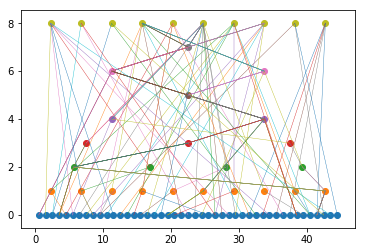

In [10]:
max_nodes_one_layer = np.max(length_of_each_layer)
for path in all_path_side2side:
    node1, node2 = path
    x1, y1 = dict_nodes_graph[node1]
    x2, y2 = dict_nodes_graph[node2]
    
    interval1 = max_nodes_one_layer/length_of_each_layer[y1]
    interval2 = max_nodes_one_layer/length_of_each_layer[y2]
    
    plt.plot([x1*interval1 + interval1/2, x2*interval2 + interval2/2], [y1, y2], linewidth=0.4)

for layer in range(max_length):
    interval = max_nodes_one_layer/length_of_each_layer[layer]
    plt.scatter((interval * np.arange(length_of_each_layer[layer]))+ interval/2, [layer]*length_of_each_layer[layer])

plt.show()

In [11]:
test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
test_y = digits.target[1617:]

In [12]:
numbers = [*range(10)] # number 2 > number 1
number_of_classification = len(numbers)


list_y = test_y.tolist()
digits_indexes = []
for digit in numbers:
    li = [i for i in range(len(list_y)) if list_y[i] == digit]
    digits_indexes.extend(li)

samplesize = test_X[digits_indexes].shape[0]
test_x_inputs =[tuple(c) for c in test_X[digits_indexes].tolist()]
test_x_outputs = [tuple(c) for c in test_y[digits_indexes].reshape(samplesize,1).tolist()]

In [13]:
outputs = []
for xi in test_x_inputs:
    output = winner_net.activate(xi)
    outputs.append(output)


px_outputs = softmax(np.array(outputs).reshape(samplesize, number_of_classification), axis=1)
# the index of maximum in each line
test_pred_outputs = np.argmax(px_outputs, axis = 1)
# replace index to real number, from higher number to lower number!!
for i in range(number_of_classification):
    index = number_of_classification - i - 1
    test_pred_outputs[test_pred_outputs==index] = numbers[index]

test_real_outputs = np.array(test_x_outputs).reshape(samplesize,)

In [14]:
test_real_outputs

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9])

In [15]:
test_pred_outputs

array([0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 7, 1,
       1, 4, 1, 1, 1, 1, 7, 7, 1, 7, 1, 1, 1, 1, 7, 1, 7, 7, 7, 7, 1, 5,
       1, 1, 7, 7, 7, 7, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 7, 3, 0, 1, 3, 3,
       3, 3, 1, 3, 7, 4, 4, 4, 7, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 1, 5, 1, 5, 5, 7, 7, 4, 1, 1, 5, 4, 7, 4, 3, 3, 4, 3, 1, 1,
       1, 1, 4, 4, 4, 4, 1, 4, 0, 1, 4, 4, 1, 1, 1, 4, 7, 5, 7, 7, 7, 7,
       7, 7, 4, 7, 4, 7, 7, 7, 4, 7, 7, 4, 7, 1, 4, 4, 4, 1, 1, 1, 7, 7,
       7, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 5, 3, 1, 3, 3, 3, 5, 3, 3,
       5, 1, 3, 3])

In [16]:
np.sum(test_pred_outputs == test_real_outputs)/samplesize

0.4222222222222222

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_pred_outputs, test_real_outputs)
print(cm)

[[15  0  0  1  0  0  1  0  0  0]
 [ 0 14  6  4  0  4  9  0 11  5]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 12  0  3  0  0  0  8]
 [ 1  1  0  0 17  4  8  4  3  0]
 [ 0  0  1  0  0  4  0  1  0  5]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  4  9  1  3  3  0 14  3  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]]


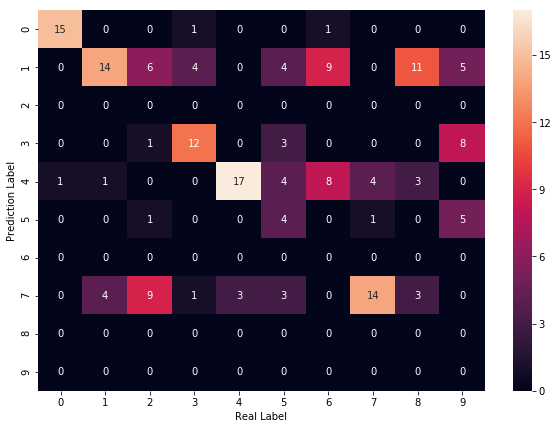

In [18]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [28]:
visualize.draw_net(config, winner, prune_unused=False)
visualize.plot_stats(stats, ylog=False, view=False)
visualize.plot_species(stats, view=False)

In [29]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

In [36]:
used_nodes = list(winner.nodes.keys())
# create a dict for mapping 
l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
l2 = range(len(l1))
dict_nodes = dict(zip(l1, l2))

### 将节点加入图
g = Graph(len(l1))# inputs + outputs + used  
# add connections in the graph
for cg in winner.connections.values():
    if cg.enabled:
        g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])
        
v = numbers
list_connections = []
for vi in v:
    for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
        list_connections.append(g.isReachable(u, vi))

nodes_inputs = range(number_of_classification, number_of_classification+ 64)
nodes_outputs = range(number_of_classification)
nodes_mid = range(number_of_classification + 64, len(dict_nodes))

# 找到所有输入和输出连接的路
all_path = []
for u in nodes_inputs:
    for v in nodes_outputs:
        path = findAllPath(g.graph, u, v)
        if path:
            all_path = all_path + path

# 得到最长路，以及每个节点在哪个层级
max_length = max([len(x) for x in all_path])
nodes_tuples_list = []
for path in all_path:
    #print(path)
    for node in path:
        nodes_tuples_list.append([node, path.index(node)])

# 确定节点的层级（消除重复）       
nodes_tuples_fixed_list = []
for index in range(max_length):
    for nodes in nodes_tuples_list:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            if nodes not in nodes_tuples_fixed_list:
                nodes_tuples_fixed_list.append(nodes)

    
# 所有有连接的节点
all_used_nodes = []
for node in nodes_tuples_fixed_list:
    if node[0] not in all_used_nodes:
        all_used_nodes.append(node[0])

# 确定节点的层级（最终确定）
nodes_tuples_fixed_list_final = []

for node in all_used_nodes:
    if node in nodes_inputs:
        nodes_tuples_fixed_list_final.append([node, 0])
    elif node in nodes_outputs:
        nodes_tuples_fixed_list_final.append([node, max_length - 1])
    else:
        list_node = []
        for nodes in nodes_tuples_fixed_list:
            if node == nodes[0]:
                list_node.append(nodes)
        layer = 0
        for ele in list_node:
            # 删除重复项，取最大
            if ele[1] > layer:
                layer = ele[1]
        nodes_tuples_fixed_list_final.append([node,layer])


# 每个层级的节点合数
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_fixed_list_final:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            number_of_nodes += 1
    length_of_layers.append(number_of_nodes)

length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

# 输出每个层级的节点个数
print("length of each layers:", length_of_each_layer)

# 所有端到端的路
all_path_side2side = []
for path in all_path:
    if len(path) == 2:
        all_path_side2side.append(path)
    else:
        for i in range(len(path)-1):
            all_path_side2side.append([path[i],path[i+1]])

# 定义节点到绘图的字典
dict_nodes_graph = dict()
count_number_layer = [0] * max_length
for nodes in nodes_tuples_fixed_list_final:
    node, layer = nodes
    dict_nodes_graph[node] = [count_number_layer[layer], layer]
    count_number_layer[layer] += 1

length of each layers: [45, 10, 4, 3, 2, 1, 2, 1, 10]


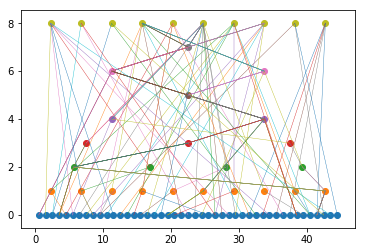

In [37]:
max_nodes_one_layer = np.max(length_of_each_layer)
for path in all_path_side2side:
    node1, node2 = path
    x1, y1 = dict_nodes_graph[node1]
    x2, y2 = dict_nodes_graph[node2]
    
    interval1 = max_nodes_one_layer/length_of_each_layer[y1]
    interval2 = max_nodes_one_layer/length_of_each_layer[y2]
    
    plt.plot([x1*interval1 + interval1/2, x2*interval2 + interval2/2], [y1, y2], linewidth=0.4)

for layer in range(max_length):
    interval = max_nodes_one_layer/length_of_each_layer[layer]
    plt.scatter((interval * np.arange(length_of_each_layer[layer]))+ interval/2, [layer]*length_of_each_layer[layer])

plt.show()

In [23]:
stats

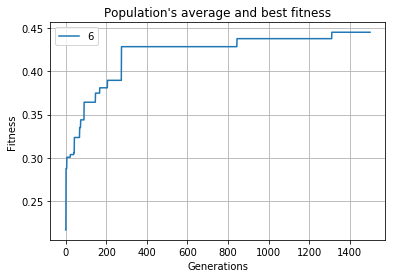

In [24]:

statistics = stats

generation = range(len(statistics.most_fit_genomes))
best_fitness = [c.fitness for c in statistics.most_fit_genomes]
avg_fitness = np.array(statistics.get_fitness_mean())
stdev_fitness = np.array(statistics.get_fitness_stdev())



#plt.plot(generation, avg_fitness, "b-", label="average")
#plt.plot(generation, avg_fitness - stdev_fitness, "g-.", label="-1 sd")
#plt.plot(generation, avg_fitness + stdev_fitness, "g-.", label="+1 sd")

plt.plot(generation, best_fitness, label=i)

plt.title("Population's average and best fitness")
plt.xlabel("Generations")
plt.ylabel("Fitness")
plt.grid()
plt.legend(loc="best")
plt.show()

In [35]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(10)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []


used_nodes = list(winner.nodes.keys())
# create a dict for mapping 
l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
l2 = range(len(l1))
dict_nodes = dict(zip(l1, l2))

### 将节点加入图
g = Graph(len(l1))# inputs + outputs + used  
# add connections in the graph
for cg in winner.connections.values():
    if cg.enabled:
        g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

v = numbers
list_connections = []
for vi in v:
    for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
        list_connections.append(g.isReachable(u, vi))

nodes_inputs = range(number_of_classification, number_of_classification+ 64)
nodes_outputs = range(number_of_classification)
nodes_mid = range(number_of_classification + 64, len(dict_nodes))

# 找到所有输入和输出连接的路
all_path = []
for u in nodes_inputs:
    for v in nodes_outputs:
        path = findAllPath(g.graph, u, v)
        if path:
            all_path = all_path + path

# 得到最长路，以及每个节点在哪个层级
max_length = max([len(x) for x in all_path])
nodes_tuples_list = []
for path in all_path:
    #print(path)
    for node in path:
        nodes_tuples_list.append([node, path.index(node)])

# 确定节点的层级（消除重复）       
nodes_tuples_fixed_list = []
for index in range(max_length):
    for nodes in nodes_tuples_list:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            if nodes not in nodes_tuples_fixed_list:
                nodes_tuples_fixed_list.append(nodes)


# 所有有连接的节点
all_used_nodes = []
for node in nodes_tuples_fixed_list:
    if node[0] not in all_used_nodes:
        all_used_nodes.append(node[0])

# 确定节点的层级（最终确定）
nodes_tuples_fixed_list_final = []

for node in all_used_nodes:
    if node in nodes_inputs:
        nodes_tuples_fixed_list_final.append([node, 0])
    elif node in nodes_outputs:
        nodes_tuples_fixed_list_final.append([node, max_length - 1])
    else:
        list_node = []
        for nodes in nodes_tuples_fixed_list:
            if node == nodes[0]:
                list_node.append(nodes)
        layer = 0
        for ele in list_node:
            # 删除重复项，取最大
            if ele[1] > layer:
                layer = ele[1]
        nodes_tuples_fixed_list_final.append([node,layer])


# 每个层级的节点合数
length_of_layers = []
number_of_nodes = 0
for index in range(max_length):
    for nodes in nodes_tuples_fixed_list_final:
        node, node_index = nodes[0], nodes[1]
        if node_index == index: 
            number_of_nodes += 1
    length_of_layers.append(number_of_nodes)

length_of_each_layer = []
length_of_each_layer.append(length_of_layers[0])
for i in range(1, max_length):
    length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

# 输出每个层级的节点个数
#print("length of each layers:", length_of_each_layer)

# 所有端到端的路
all_path_side2side = []
for path in all_path:
    if len(path) == 2:
        all_path_side2side.append(path)
    else:
        for i in range(len(path)-1):
            all_path_side2side.append([path[i],path[i+1]])

# 定义节点到绘图的字典
dict_nodes_graph = dict()
count_number_layer = [0] * max_length
for nodes in nodes_tuples_fixed_list_final:
    node, layer = nodes
    dict_nodes_graph[node] = [count_number_layer[layer], layer]
    count_number_layer[layer] += 1
list_nodes_number.append(np.sum(length_of_each_layer))
list_connection_number.append(len(all_path_side2side))
#print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:78 Total connections::191
